<a href="https://colab.research.google.com/github/Qntumth/metodos_numericos/blob/main/M%C3%A9todos_Interativos_JJQB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metodos Iterativos.
####Sistemas de ecuaciones lineales.
---



El metodo tridiagonal presentado anteriormente muestra que el costo computacional al resolver $Ax=b$ puede ser reducido si al reducir una matriz esta tiene un estructura conocida. Si la dimensión de el sistema es grande y si el sistema es _sparse_ (es decir, A tiene elementos nulos) entonces los metodos iterativos son mas atractivos sobre los metodos directos. 

Dos de esos metodos iterativos son presentados en esta sección. Esas dos forman la base de una familia de metodos los cuals estan diseñados tambien para acelerar la convergencia o correr en alguna arquitectura particular de alguna computadora.

Los metodos pueden ser vistos en terminos de separar $A$ en la suma de sus partes. Espesificamente, $A=D+L+U$ donde $L$ y $U$ son las matrices inferiores y superiores (estrictamente) de A (No confundir con la factorización LU). Aquí $D$ es la matriz diagonal A. Por ejemplo para una matriz $2\times 2$.



$$ \underbrace{\begin{bmatrix}
a_1 & a_2 \\
b_1 & b_2 
\end{bmatrix}}_{\text{A}}  = \underbrace{\begin{bmatrix}
a_1 & 0 \\
0 & b_2 
\end{bmatrix}}_{\text{D}}  + \underbrace{\begin{bmatrix}
0 & 0 \\
b_1 & 0 
\end{bmatrix}}_{\text{L}} +\underbrace{\begin{bmatrix}
0 & a_2 \\
0 & 0 
\end{bmatrix}}_{\text{U}} $$

Los elementos en estas matrices pueden ser descritos como 


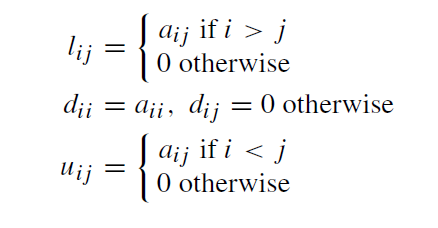

El metodo tambien puede ser visto como un reordenamiento de el sistema original en la forma.

$$\underbrace{\begin{array}a
 x_1 =\left[ b_1 - (a_{12}x_2+a_{13}x_3+\cdots+ a_{1n})x_n)\right]/a_{11}\\
x_2 =\left[ b_1 - (a_{21}x_1+a_{23}x_3+\cdots+ a_{2n})x_n)\right]/a_{22}
\\
\vdots
\\
x_n \left[ b_n - (a_{n1}x_1+a_{n2}x_2+\cdots+ a_{n(n-1)})x_{n-1})\right]/ a_{nn}
 \end{array}}_{(1)} $$

Que es de hecho el resultado de resolver la $i$-esima ecuación para $x_i$ en terminos de las variables desconocidas restantes. Hay una pequeña suposición que no hemos mencionado en (!), que es, que todos los elementos en la diagonal son diferentes de cero (Es siempre posible reordenar las ecuaciones de un sistema no singular para asegurarnos que la condicion sea satisfecha). Este reordenamiento del sistema original nos lleva en si misma a un tratamiento iterativo.



Para la **Iteracion de Jacabi**, generamos el siguiente vector solucion estimado para elpresente por sustituir los componentes actules en el lado derecho de (1) para obtener las siguientes iteraciones. En terminos de matrices
$$\underbrace{x^{k+1}=D^{-1}\left[ b-(L+U)x^{k}\right]}_{(2)}$$
donde el superindice aqui representa un contador de iteraciones, así que el vector $x^k$ es la $k$-esima iteración. En terminos de componentes, tenemos

$$\underbrace{\begin{array}a
 x_1^{(k+1)} =\left[ b_1 - (a_{12}x_2^{(k)}+a_{13}x_3^{(k)}+\cdots+ a_{1n})x_n^{(k)})\right]/a_{11}\\
x_2^{(k+1)} =\left[ b_1 - (a_{21}x_1^{(k)}+a_{23}x_3^{(k)}+\cdots+ a_{2n})x_n^{(k)})\right]/a_{22}
\\
\vdots \hspace{3cm} \vdots \hspace{3cm} \vdots \hspace{3cm} \vdots \hspace{2cm} \vdots
\\
x_n^{(k+1)} \left[ b_n - (a_{n1}x_1^{(k)}+a_{n2}x_2^{(k)}+\cdots+ a_{n(n-1)})x_{n-1}^{(k)})\right]/ a_{nn}
 \end{array}}_{(3)} $$



In [ ]:
import numpy as np

def jacobit(A, b, Nits):
  """Crea ua matriz para calcular 'nits' operaciones para
  el metodo de Jacobi para Ax=b donde 'A' debe de ser una matriz cuadrada"""
  D = np.diag(A) #np.diag Extrae La Diagonal De La Matriz A. 
  n = A.shape[0]
  n_1 = A.shape[1]
  if n != n_1:
    return "La matriz A no es cuadrada, por tanto no se puede aplicar el metodo iterativo de Jacobi"
  A_D = A - np.diag(D) # Este es L+U, np.diag(D) Crea Una Matriz Diagonal  nxn Con Elementos En La Diagonal . 
  x = np.zeros(n)
  s = np.zeros((n, Nits))
  for k in range(Nits):
    x = (b- A_D.dot(x))/D
    s[:, k] = x
  return x



_Ejemplo 10._ Realize las primeras tres iteraciones de Jacobi para la solucion del sistema

$$\begin{array}l 6x_1+3x_2+2x_3=26\\
2x_1+5x_2+x_3=17\\
x_1+x_2+4x_3=9
\end{array}.$$

**Solución**. Reescribiendo las ecuaciones como en (1), obtenemos

$$\begin{array}l x_1 = \frac{26-(3x_2+2x_3)}{6}\\
x_2= \frac{17-(2x_1+x_3)}{5}\\
x_3 = \frac{9-(x_1+x_2)}{4}
\end{array}.$$

tomando la iteracion inicial sugerida $x^0=0$, obtenemos las siguientes iteraciones, entonces:
$$\begin{array}l x_1 = \frac{26-(3*0+2*0)}{6}=\frac{26}{6}\approx4.3333\\
x_2= \frac{17-(2*0+0)}{5}=\frac{17}{5}\approx 3.4\\
x_3 = \frac{9-(0+0)}{4}=\frac{9}{4}\approx 2.2500
\end{array}.$$

las siguientes dos iteraciones nos dan
$$x_1^2=1.8833 \hspace{2cm} x_2^2=1.2176 \hspace{2cm} x_3^2=0. 3167 \\x_1^6=3.6194\hspace{2cm} x_2^3=2.5833 \hspace{2cm} x_3^3=1.4750$$

los cuales lentamente se acercaran a la verdadera solución $\left[3,2,1\right]^T$. De hecho eventualmente la novena iteración nos dará $x^{(9)}=\left[3.048,2.0420,1.0353\right] ^T$.

Claramente para este pequeño sistema lienal, la presicion de la solucion es menos confortable que puede ser encontrada a traves de un metodo de resolucion directa. El proposito de este ejemplo simple es ilustrar como las iteraciones funcionan.



In [ ]:
A = np.array([[6,3,2],[2,5,1],[1,1,4]])
b = np.array([26,17,9])
SJ = jacobit(A,b,11)
SJ

array([3.0211395 , 2.0176996 , 1.01493933])

Realizar los pasos a mano del algoritmo parece traer una pregunta a la mente. Una vez que $x_i^{(k+1)}$ ha sido obtenido de la primera ecuación en (3), ¿Por que no usar el valor más reciente en el lugar de $x_i^k$ en el restante para las actualizaciones en (3)?
Esto de hecho, es una gran idea, esta idea fue llamada _Gauss-Seidel iteration_:
$$\underbrace{\begin{array}a
 x_1^{(k+1)} =\left[ b_1 - (a_{12}x_2^{(k)}+a_{13}x_3^{(k)}+\cdots+ a_{1n})x_n^{(k)})\right]/a_{11}\\
x_2^{(k+1)} =\left[ b_1 - (a_{21}x_1^{(k+1)}+a_{23}x_3^{(k)}+\cdots+ a_{2n})x_n^{(k)})\right]/a_{22}
\\
\vdots \hspace{3cm} \vdots \hspace{3cm} \vdots \hspace{3cm} \vdots \hspace{2cm} \vdots
\\
x_n^{(k+1)}= \left[ b_n - (a_{n1}x_1^{(k+1)}+a_{n2}x_2^{(k+1)}+\cdots+ a_{n(n-1)})x_{n-1}^{(k+1)})\right]/ a_{nn}
 \end{array}}_{(4)} $$

Notemos que lo unico que cambia respecto al metodo de Jacobi es que utiliza la iteracion del valor $x_i^k$ para calcular el siguiente valor $x_i^(k+1)$ y los valores ya clculados los sustituye en la iteración. O en terminos de matrices, 

$$\underbrace{x^{(k+1)}=D^{-1}\left[ b-\left(Lx^{(k+1)}+Ux^{k}\right)\right]}_{(5)}$$

Notemos que (5) deberia ser entendido como un asignamiento de valores de la parte derecha al lado izquierdo donde las entradas $x^{(k+1)}$ son actualizadas secuencialmente en un ordena natural.



---



_Ejemplo 11._ Repita el ejemplo 10 usando _Gauss-Siedel iteration_.

**Solución.** Con la iteracion inicial igual que en ejemplo 10, la primera iteración es

$$\begin{array}l x_1^1 = \frac{26-(3*0+2*0)}{6}=\frac{26}{6}\approx4.3333\\
x_2^1= \frac{17-(2*4.333+0)}{5}\approx 1.6667\\
x_3^1 = \frac{9-(4.3333+1.6667)}{4}=\frac{9}{4}\approx 0.7500
\end{array}.$$
Las siguientes dos iteraciones entonces producen el estimado:

$$x_1^2=3.25 \hspace{2cm} x_2^2=1.95 \hspace{2cm} x_3^2=0.95 \\x_1^3=3.0417\hspace{2cm} x_2^3=1.9933 \hspace{2cm} x_3^3=0.9912$$

cuales numeros son mucho mas cercanos a la solucion verdadera que el metodo de iteración de Jacobi para el mismo valor computacional.



---


Ninguna de los iteraciones (3) o (4) usan rudamente $n^2$ multplicaciones  y $n$ diviciones por iteración.  Comparando esta cantidad de operaciones con el metodo de eliminacion gaussiana, vemos que los metodos de iteracion parecen ser computacionalmente menos costosos si estos convergen en menos de $n/3$ iteraciones. Para sistemas _sparse_ esto podria ser el caso.

Con cualquier metodo iterativo nos surge una pregunta, ¿bajo qué condiciones el método convergerá? En los ejemplos anteriores mostramos que convergian, pero desafortunadamente esto no es una garantia de que se comporten de esa manera tales metodos iterativos.


---


**Definición.** La matriz de coeficientes es diagonalmente dominante si cada elemento en la diagonal es mayor que la suma de valores absolutos de las otras entradas de la fila o

$$|a_{ii}| > \sum_{i\neq j} |a_{ij}|$$

para cada $i$. 


---


Para nuestros ejemplos de la matriz de coeficientes del ejemplo 10, tenemos que $6>3+2$, $5>2+1$, y $4>1+1$, por tanto la matriz de coeficientes del ejemplo 10 es diagonalmente dominante.

(**) La condicion más simle bajo ambos metodos iterativos (Jacobi y Gauss-Seidel) puede ser probada su convergencia es cuando la matriz de coeficientes es diagonalmente dominante.



In [ ]:
import numpy as np

def gs(A, b, Nits):
  """Metodo de Gauss Seidel. 
  Pide un sistema de eciaiones, A, b. Donde hace el numero 'Nits' de iteraciones y lo resuelve.
  Autor: @J^2QB"""
  D = np.diag(A) #np.diag Extrae La Diagonal De La Matriz A. 
  n = A.shape[0]
  n_1 = A.shape[1]
  if n != n_1:
    return "La matriz A no es cuadrada, por tanto no se puede aplicar el metodo iterativo de Jacobi"
  A_D = A - np.diag(D) # Este es L+U, np.diag(D) Crea Una Matriz Diagonal  nxn Con Elementos En La Diagonal . 
  x = np.zeros(n)
  s = np.zeros((n, Nits))
  for k in range(Nits):
    for i in range(n):
      x[i] = (b[i]- A_D.dot(x)[i])/D[i]
      s[i, k] = x[i]
  return x

In [ ]:
import numpy as np

n = 10
d = np.eye((n))*4
d_p1 = -1*np.eye(n,k=1) 
d_l1 = -1*np.eye(n,k=-1)
matrix = d+d_p1+d_l1 
b = np.array([9,5,5,5,5,5,5,5,5,5])
solution = gs(matrix,b,20)
print(solution)
solution_np = np.linalg.solve(matrix,b)
error = np.abs(solution_np-solution)
error

[2.90191936 2.60767745 2.52879042 2.50748425 2.50114659 2.4971021
 2.48726181 2.45194513 2.3205187  1.83012968]


array([1.88258298e-11, 1.74917858e-11, 1.18443033e-11, 6.90159041e-12,
       3.63131747e-12, 1.75282011e-12, 7.76267939e-13, 3.09974268e-13,
       1.06581410e-13, 2.66453526e-14])

In [ ]:
l  = gs(A,b,11)
l,SJ

(array([2.99999999, 2.        , 1.        ]),
 array([3.0211395 , 2.0176996 , 1.01493933]))

#Método de Gradiente Conjugado.

Consideremos el problema de encontrar el vector $x$ que minimiza la función escalar.

$$\underbrace{f(x)=\frac{1}{2}x^T Ax-b^Tx}_{(6)}$$

donde la matriz *$A$* es _simetrica_ y positiva. Porqu $f(x)$ es minimizada cuando su gradiente $\nabla f =Ax-b$ es cero, vemos que la minimización es equivalente a resolver

$$\underbrace{Ax=b}_{(7)}$$

Los métodos de gradiente ejecutan la miniminación por iteración, empezamos con un vector inicial $x_0$. Cada ciclo iterativo $k$ calcula una solución refinada

$$\underbrace{x_{k+1}=x_k+\alpha_k s_k}_{(8)}$$

El _largo del paso_ $\alpha_k$ es dado así que $x_{k+1}$ minimiza $f(x_{k+1})$ en la _direccion de busqueda_ $s_k$. Esto es, $x_{k+1}$ deberia satisfacer (7):

$$\underbrace{A(x_k+\alpha_k s_k)=b}_{(a)}$$
introducimos el _residual_
$$r_k = b - Ax_k$$
así la ecuación (a) se convierte en $$\alpha_k As_k = r_k$$
Mulplicando en ambos lados por $s_k^T$ y resolviendo para $\alpha_k$, obtenemos
$$\alpha_k = \frac{s_k^T r_k}{s_k^T A s_k}$$

 Sin embargo, aun tenemos el problema de determinar la _dirección de busqueda_ $s_k$. Intuición nos dice el escojer $s_k = -\nabla f =r_k$, porque esta es la direccion de el más grande cambio negativo en $f(x)$. El procedimiento resultante es conocido como el método del rapido desecenso. Este no es un algoritmo popular debido a que su convergencia puede ser lenta. Sin embargo, el más eficiente metodo de gradiente conjugado usa la direccion de busqueda


 $$\underbrace{s_{k+1}=r_{k+1}+\beta_{k}s_k}_{(9)}$$

 La constante $\beta_k$ es elegida. Así qe las dos busquedas de direccion sucesivas son conjugadas una a otra, es decir,
 
 $$\underbrace{s_{k+1}^{T}As_k=0}_{(b)}$$

 El gran atracctivo del metodo de gradientes conjugados es la minimizacion en una direccion conjugada no borra las minimizaciones previas (minimizaciones no interfiere uno con otro.)
Sustituyendo $s_{k+1}$ de la ecuacion (9) en (b), obtenemos,

$$\beta_k=\frac{r_{k+1}^{T}+As_{k}}{s_{k}^{T}As_k}$$


Puede ser mostrado que los vecotres residuales $r_1,r_2,r_3,...$ producidos por el algoritmo son mutuamente ortogonales, esto es $r_i \dot r_j = 0$, $i\neq j$. Ahora supongamos que hemos realizado suficientes iteraciones para tener calculado todo el conjunto e los $n$ vectores residuales. El rresidual resultante de la siguiente iteracion deberá ser un vector nulo ($r_{n+1}=0$), indicando que la solucion ha sido obtenida.


Pareceria que el algoritmo de gradiente conjugado no es un método iterativo del todo, porque este alcanza la solución exacta despues de $n$ ciclos computacionales. En la practica, como sea, la convergencia es usualmente alcanzada en menos de $n$ iteraciones.
El metodo de gradiente conjugado es no competitivo con los metodos directos en la solución de un pequeño conjunto de ecuaciones. Su fuerza esta en el manejo de grandes sistemas, sistemas separados. Es importante notar que $A$ entra el algoritmo solo atraves de multiplicacion por un vector, esto es, en la forma $Av$, donde $v$ es un vector (tampoco $x_{k+1}$ o $S_k$).

#$\blacksquare$ conjGrad
La funcion _conjGrand_ mostrado a continuacion implenmeta el metodo de gradiente conjugado. El numero maximo de iteraciones permitibles es el conjunto de $n$ (el numero de varibales). Notemos que _conjGrad_ llama la funcion Av que regresa el producto $Av$. Esta funcion deberia ser dada por el usuario. El usuario deberia ser proveido el vector inicial $x_0$ y las constante (lado derecho) vector $b$. La función regresa el vector solución $x$ y el numero de iteraciones.  

In [ ]:
import numpy as np
import math

def conjGrad(Av,x,b,tol=1.0e-9):
  n = len(b)
  r = b - Av(x)
  s = r.copy()
  for i in range(n):
    u = Av(s)
    alpha = np.dot(s,r)/np.dot(s,u)
    x = x + alpha*s
    r = b - Av(x)
    if (math.sqrt(np.dot(r,r))) < tol:
      break
    else:
      beta = -np.dot(r,u)/np.dot(s,u)
      s = r +beta*s
  return x,i

_Ejemplo 2.15_. Resueva las siguientes ecuaciones
$$ $$
$$\begin{bmatrix}
4 & -1 & 1 \\
-1 & 4 & -2 \\
1 & -2 & 4 \\
\end{bmatrix}
\begin{bmatrix} 
x_1 \\ 
x_2 \\ 
x_3 \\
\end{bmatrix}
=
\begin{bmatrix}12 \\ -1 \\ 5 \end{bmatrix}$$
$$ $$
Por el metodo de gradiente conjugado.
_Solución._ 

El método de gradiente conjugado deveria converge despues de tres iteraciones. Escojiendo otra vez el vector inicial

$$x_0 = \begin{bmatrix} 0 & 0 & 0\end{bmatrix}^T$$
Sean 
$$b=\begin{bmatrix}
12 \\ -1 \\ 5
\end{bmatrix}, \hspace{0.5cm} v=\begin{bmatrix}
4 & -1 & 1 \\
-1 & 4 & -2 \\
1 & -2 & 4 \\
\end{bmatrix}
   .$$

Pasamos esto a codigo de python

In [ ]:
import numpy as np

b = np.array([12,-1,5])
v = np.array([[4,-1,1],[-1,4,-2],[1,-2,4]])
x = np.zeros(3)

sol = conjGrad(v,x,b)
sol


TypeError: ignored